In [1]:
# Librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/processed/df_listo_para_eda.csv',sep=';')
df

,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,Destino Turistico,CUT Provincia Destino,...,Anio,CUT Mes,Mes,Viajes Ocasionales,Temporada,PIB Region Origen,PIB Region Destino,Total Temporada Region,Total Temporada Provincia,Total Temporada Comuna
0,1101,Iquique,11,Iquique,1,Tarapacá,1402,Camiña,Camiña,14,...,2019,1,enero,109,Alta,1061.580205,1061.580205,268129,76446,1276
1,1101,Iquique,11,Iquique,1,Tarapacá,1403,Colchane,Colchane - P.N. Volcán Isluga,14,...,2019,1,enero,298,Alta,1061.580205,1061.580205,268129,76446,5512
2,1101,Iquique,11,Iquique,1,Tarapacá,1404,Huara,Resto región Tarapacá,14,...,2019,1,enero,2594,Alta,1061.580205,1061.580205,268129,76446,22586
3,1101,Iquique,11,Iquique,1,Tarapacá,1405,Pica,Pica,14,...,2019,1,enero,4138,Alta,1061.580205,1061.580205,268129,76446,21894
4,1101,Iquique,11,Iquique,1,Tarapacá,2101,Antofagasta,Antofagasta,21,...,2019,1,enero,2071,Alta,1061.580205,3724.530431,500988,301193,187990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2952619,16305,San Nicolás,163,Punilla,16,Ñuble,16203,Coelemu,Valle del Itata,162,...,2023,12,diciembre,17,Alta,833.567298,833.567298,790647,139183,19389
2952620,16305,San Nicolás,163,Punilla,16,Ñuble,16207,Treguaco,Resto región Ñuble,162,...,2023,12,diciembre,44,Alta,833.567298,833.567298,790647,139183,10967
2952621,16305,San Nicolás,163,Punilla,16,Ñuble,16302,Coihueco,Resto región Ñuble,163,...,2023,12,diciembre,108,Alta,833.567298,833.567298,790647,159556,23654
2952622,16305,San Nicolás,163,Punilla,16,Ñuble,16303,Ñiquén,Resto región Ñuble,163,...,2023,12,diciembre,47,Alta,833.567298,833.567298,790647,159556,32388


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952624 entries, 0 to 2952623
Data columns (total 23 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   CUT Comuna Origen          int64  
 1   Comuna Origen              object 
 2   CUT Provincia Origen       int64  
 3   Provincia Origen           object 
 4   CUT Region Origen          int64  
 5   Region Origen              object 
 6   CUT Comuna Destino         int64  
 7   Comuna Destino             object 
 8   Destino Turistico          object 
 9   CUT Provincia Destino      int64  
 10  Provincia Destino          object 
 11  CUT Region Destino         int64  
 12  Region Destino             object 
 13  Anio                       int64  
 14  CUT Mes                    int64  
 15  Mes                        object 
 16  Viajes Ocasionales         int64  
 17  Temporada                  object 
 18  PIB Region Origen          float64
 19  PIB Region Destino         float64
 20  To

In [4]:
# Verificación de filas duplicadas
print(f'Filas Duplicadas: {df.duplicated().sum()}')

Filas Duplicadas: 0


In [5]:
# Verificación de NaNs
total_nan = df.isnull().sum().sum()
print("Total de NaN en el DataFrame:", total_nan)

Total de NaN en el DataFrame: 0


In [12]:
# Identificar columnas categóricas y numéricas
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

print("Columnas categóricas:", categorical_cols)
print("Cantidad de Columnas categóricas: ", len(categorical_cols))
print("Columnas numéricas:", numerical_cols)
print("Cantidad de Columnas numéricas: ", len(numerical_cols))

Columnas categóricas: ['Comuna Origen', 'Provincia Origen', 'Region Origen', 'Comuna Destino', 'Destino Turistico', 'Provincia Destino', 'Region Destino', 'Mes', 'Temporada']
Cantidad de Columnas categóricas:  9
Columnas numéricas: ['CUT Comuna Origen', 'CUT Provincia Origen', 'CUT Region Origen', 'CUT Comuna Destino', 'CUT Provincia Destino', 'CUT Region Destino', 'Anio', 'CUT Mes', 'Viajes Ocasionales', 'PIB Region Origen', 'PIB Region Destino', 'Total Temporada Region', 'Total Temporada Provincia', 'Total Temporada Comuna']
Cantidad de Columnas numéricas:  14


In [26]:
# Analisis univariante Categorico.
# Funciones para visualizar mejor el gráfico

# Función para ajustar rotación y espacios de etiquetas del eje x

def ajustar_xticks(ax, step = 5, rotation = 90):
    labels = ax.get_xticks()
    ax.set_xticks(labels[::step])

    for label in ax.get_xticklabels():
        label.set_rotation(rotation)

# Función para etiquetar las 10 barras con los valores más altos

def resaltar_top_10(ax, data, column):
    top_10 = data[column].value_counts().nlargest(10)

# Añadir una nota en el gráfico para cada una de las 10 categorías

    for categoria, frecuencia in top_10.items():
        ax.annotate(f'{categoria}: {frecuencia}',
                    xy=(categoria, frecuencia),
                    xytext=(categoria, frecuencia * 1.1),
                    ha='center', color='red',
                    rotation=90,
                    arrowprops=dict(facecolor='red', arrowstyle="->"))

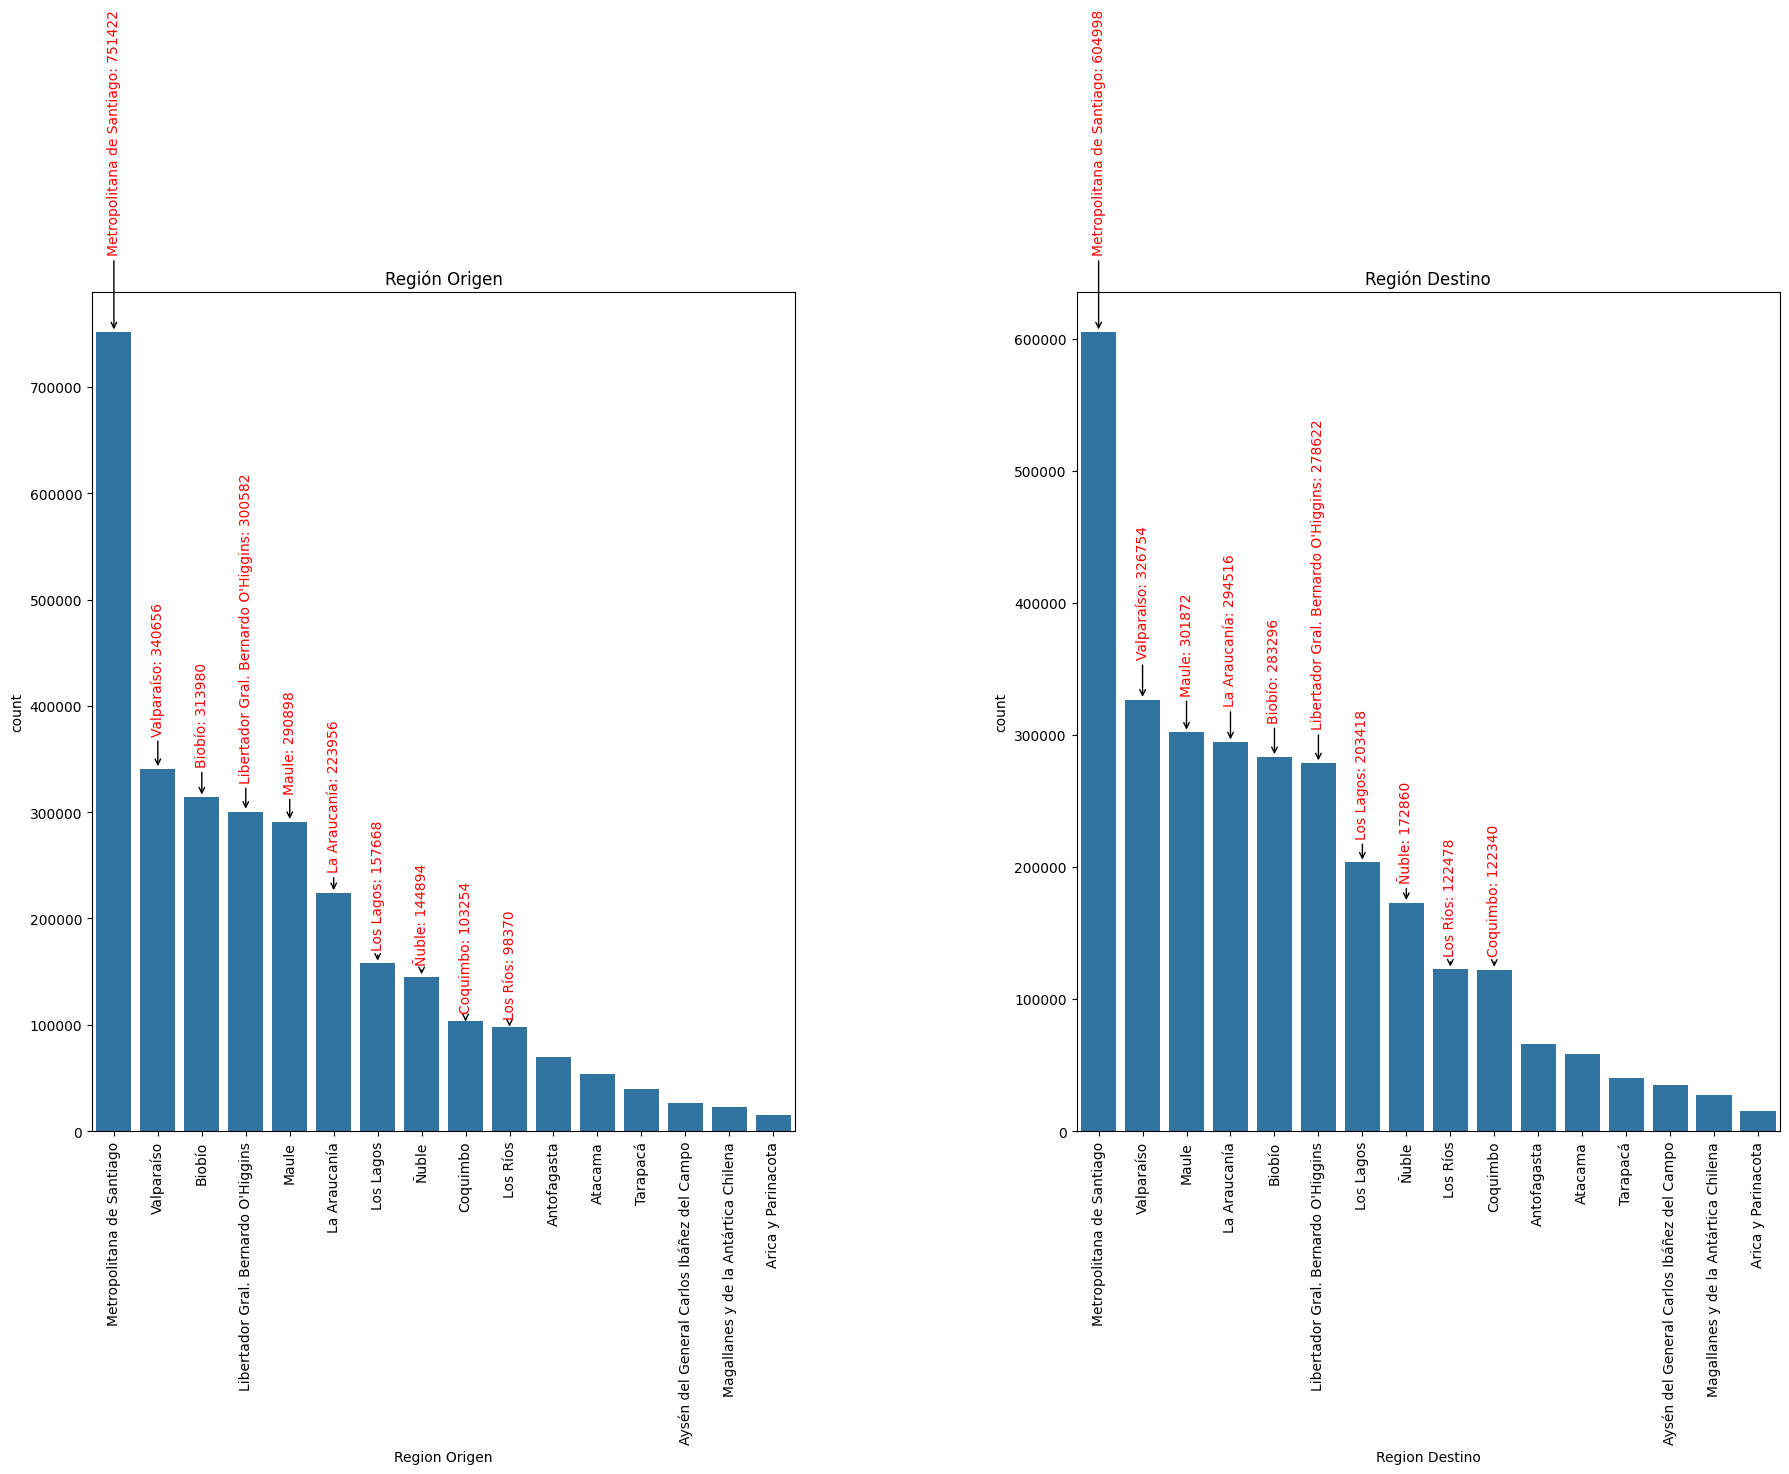

In [27]:
# Análisis univariante categórico: Regiones

fig, axes = plt.subplots(1, 2, figsize=(18, 15)) 

# Región Origen
sns.countplot(ax=axes[0], data=df, x="Region Origen", order=df["Region Origen"].value_counts().index)
axes[0].set_title("Región Origen")
resaltar_top_10(axes[0], df, "Region Origen")
ajustar_xticks(axes[0], step=1)

# Región Destino
sns.countplot(ax=axes[1], data=df, x="Region Destino", order=df["Region Destino"].value_counts().index)
axes[1].set_title("Región Destino")
resaltar_top_10(axes[1], df, "Region Destino")
ajustar_xticks(axes[1], step=1)

# Ajustar layout y márgenes
plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Mostrar el plot
plt.show()



In [7]:
# Factorizar las variables cátegoricas, para poder hacer matriz de correlaciónes 
df['CUT Destino Turistico'] = pd.factorize(df['Destino Turistico'])[0]
df['CUT Temporada'] = pd.factorize(df['Temporada'])[0]

# Ordenar columnas
columnas = [
    'CUT Comuna Origen', 'Comuna Origen', 'CUT Provincia Origen', 'Provincia Origen',
    'CUT Region Origen', 'Region Origen', 'CUT Comuna Destino', 'Comuna Destino', 'CUT Destino Turistico',
    'Destino Turistico', 'CUT Provincia Destino', 'Provincia Destino', 'CUT Region Destino',
    'Region Destino', 'Anio', 'CUT Mes', 'Mes', 'Viajes Ocasionales', 'CUT Temporada', 'Temporada',
    'PIB Region Origen', 'PIB Region Destino', 'Total Temporada Region', 'Total Temporada Provincia', 'Total Temporada Comuna'
]

df = df[columnas]

df.head()

,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,CUT Destino Turistico,Destino Turistico,...,CUT Mes,Mes,Viajes Ocasionales,CUT Temporada,Temporada,PIB Region Origen,PIB Region Destino,Total Temporada Region,Total Temporada Provincia,Total Temporada Comuna
0,1101,Iquique,11,Iquique,1,Tarapacá,1402,Camiña,0,Camiña,...,1,enero,109,0,Alta,1061.580205,1061.580205,268129,76446,1276
1,1101,Iquique,11,Iquique,1,Tarapacá,1403,Colchane,1,Colchane - P.N. Volcán Isluga,...,1,enero,298,0,Alta,1061.580205,1061.580205,268129,76446,5512
2,1101,Iquique,11,Iquique,1,Tarapacá,1404,Huara,2,Resto región Tarapacá,...,1,enero,2594,0,Alta,1061.580205,1061.580205,268129,76446,22586
3,1101,Iquique,11,Iquique,1,Tarapacá,1405,Pica,3,Pica,...,1,enero,4138,0,Alta,1061.580205,1061.580205,268129,76446,21894
4,1101,Iquique,11,Iquique,1,Tarapacá,2101,Antofagasta,4,Antofagasta,...,1,enero,2071,0,Alta,1061.580205,3724.530431,500988,301193,187990


KeyboardInterrupt: 

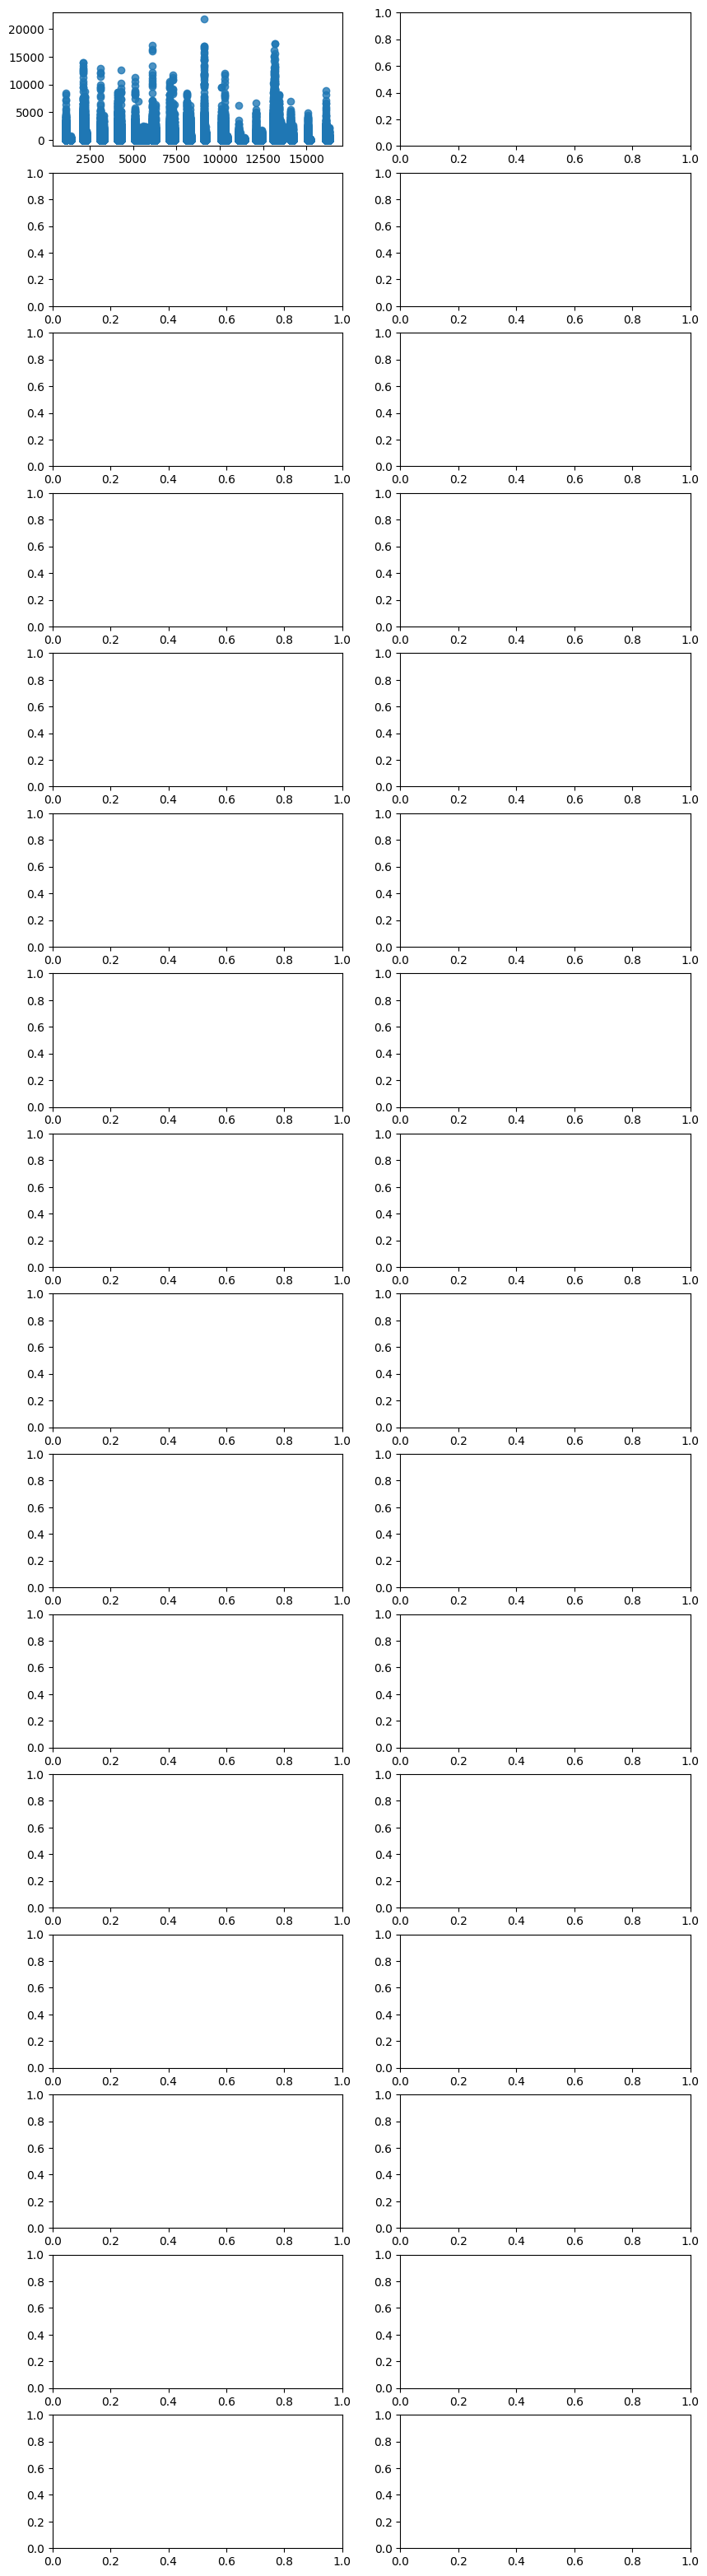

In [9]:
# Analisis Multivariante
    # Anlisis Numerico - numerico

def plot_numerical_vs_target(df, target_var):
    # Verificar que el DataFrame contiene solo variables numéricas
    if not all(df.dtypes.apply(lambda x: pd.api.types.is_numeric_dtype(x))):
        raise ValueError("El DataFrame debe contener solo variables numéricas.")

    # Verificar que la variable objetivo está en el DataFrame
    if target_var not in df.columns:
        raise ValueError(f"La variable objetivo '{target_var}' no se encuentra en el DataFrame.")

    # Obtener las variables numéricas excepto la variable objetivo
    num_vars = df.select_dtypes(include='number').columns
    num_vars = num_vars[num_vars != target_var]  # Excluir la variable objetivo

    # Calcular el número de filas necesarias para el subplot
    n_vars = len(num_vars)
    n_rows = (n_vars + 1) // 2  # Redondear hacia arriba para obtener suficientes filas

    # Crear la figura y los ejes
    fig, axis = plt.subplots(n_rows * 2, 2, figsize=(10, n_rows * 5))

    # Iterar sobre cada variable numérica y crear gráficos
    for i, var in enumerate(num_vars):
        row = i // 2 * 2  # Fila para regplot
        col = i % 2  # Columna para regplot

        # Graficar regplots
        sns.regplot(ax=axis[row, col], data=df, x=var, y=target_var)
        # Graficar heatmap
        sns.heatmap(df[[target_var, var]].corr(), annot=True, fmt='.2f', ax=axis[row + 1, col], cbar=False)

    # Eliminar ejes vacíos si hay un número impar de variables
    if n_vars % 2 != 0:
        fig.delaxes(axis[n_rows * 2 - 1, 1])

    # Ajustar el layout para evitar solapamiento
    plt.tight_layout()
    plt.show()

# Ejemplo de uso
# plot_numerical_vs_target(df, 'charges')

plot_numerical_vs_target(df[numerical_cols], 'Viajes Ocasionales')

/var/folders/3p/lzyp6b9542b_8mk_q04l5p100000gn/T/ipykernel_10309/1603840474.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)  # Rotamos las etiquetas del eje X


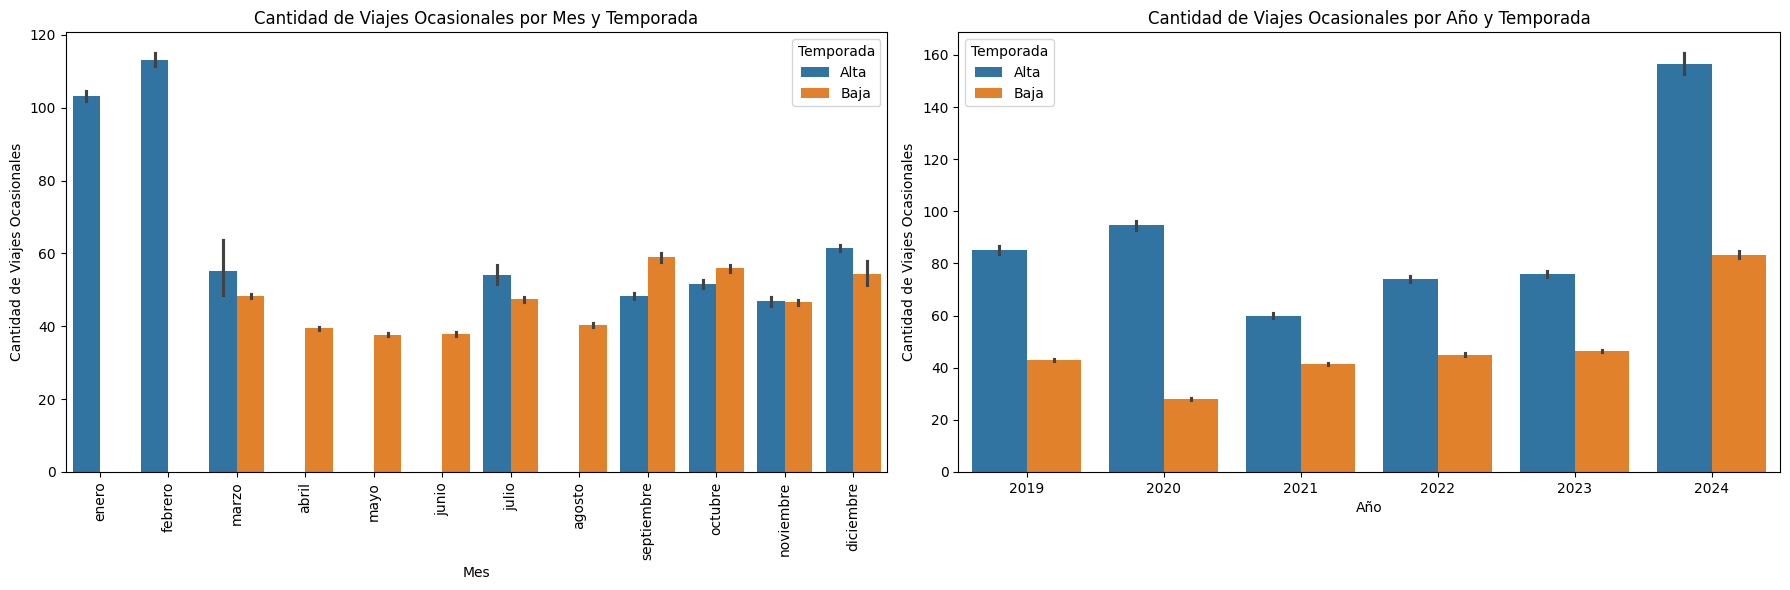

In [ ]:
# Análisis Categórico-Categórico

# Creamos la figura y los subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Viajes Ocasionales por Mes y Temporada
sns.barplot(data=df, x='Mes', y='Viajes Ocasionales', hue='Temporada', ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title("Cantidad de Viajes Ocasionales por Mes y Temporada")
ax1.set_xlabel('Mes')
ax1.set_ylabel('Cantidad de Viajes Ocasionales')

# Viajes Ocasionales por Año y Temporada
sns.barplot(data=df, x='Anio', y='Viajes Ocasionales', hue='Temporada', ax=ax2)
ax2.set_title("Cantidad de Viajes Ocasionales por Año y Temporada")
ax2.set_xlabel('Año')
ax2.set_ylabel('Cantidad de Viajes Ocasionales')

# Ajustamos el layout para que no se solapen los subgráficos
plt.tight_layout()

plt.show()


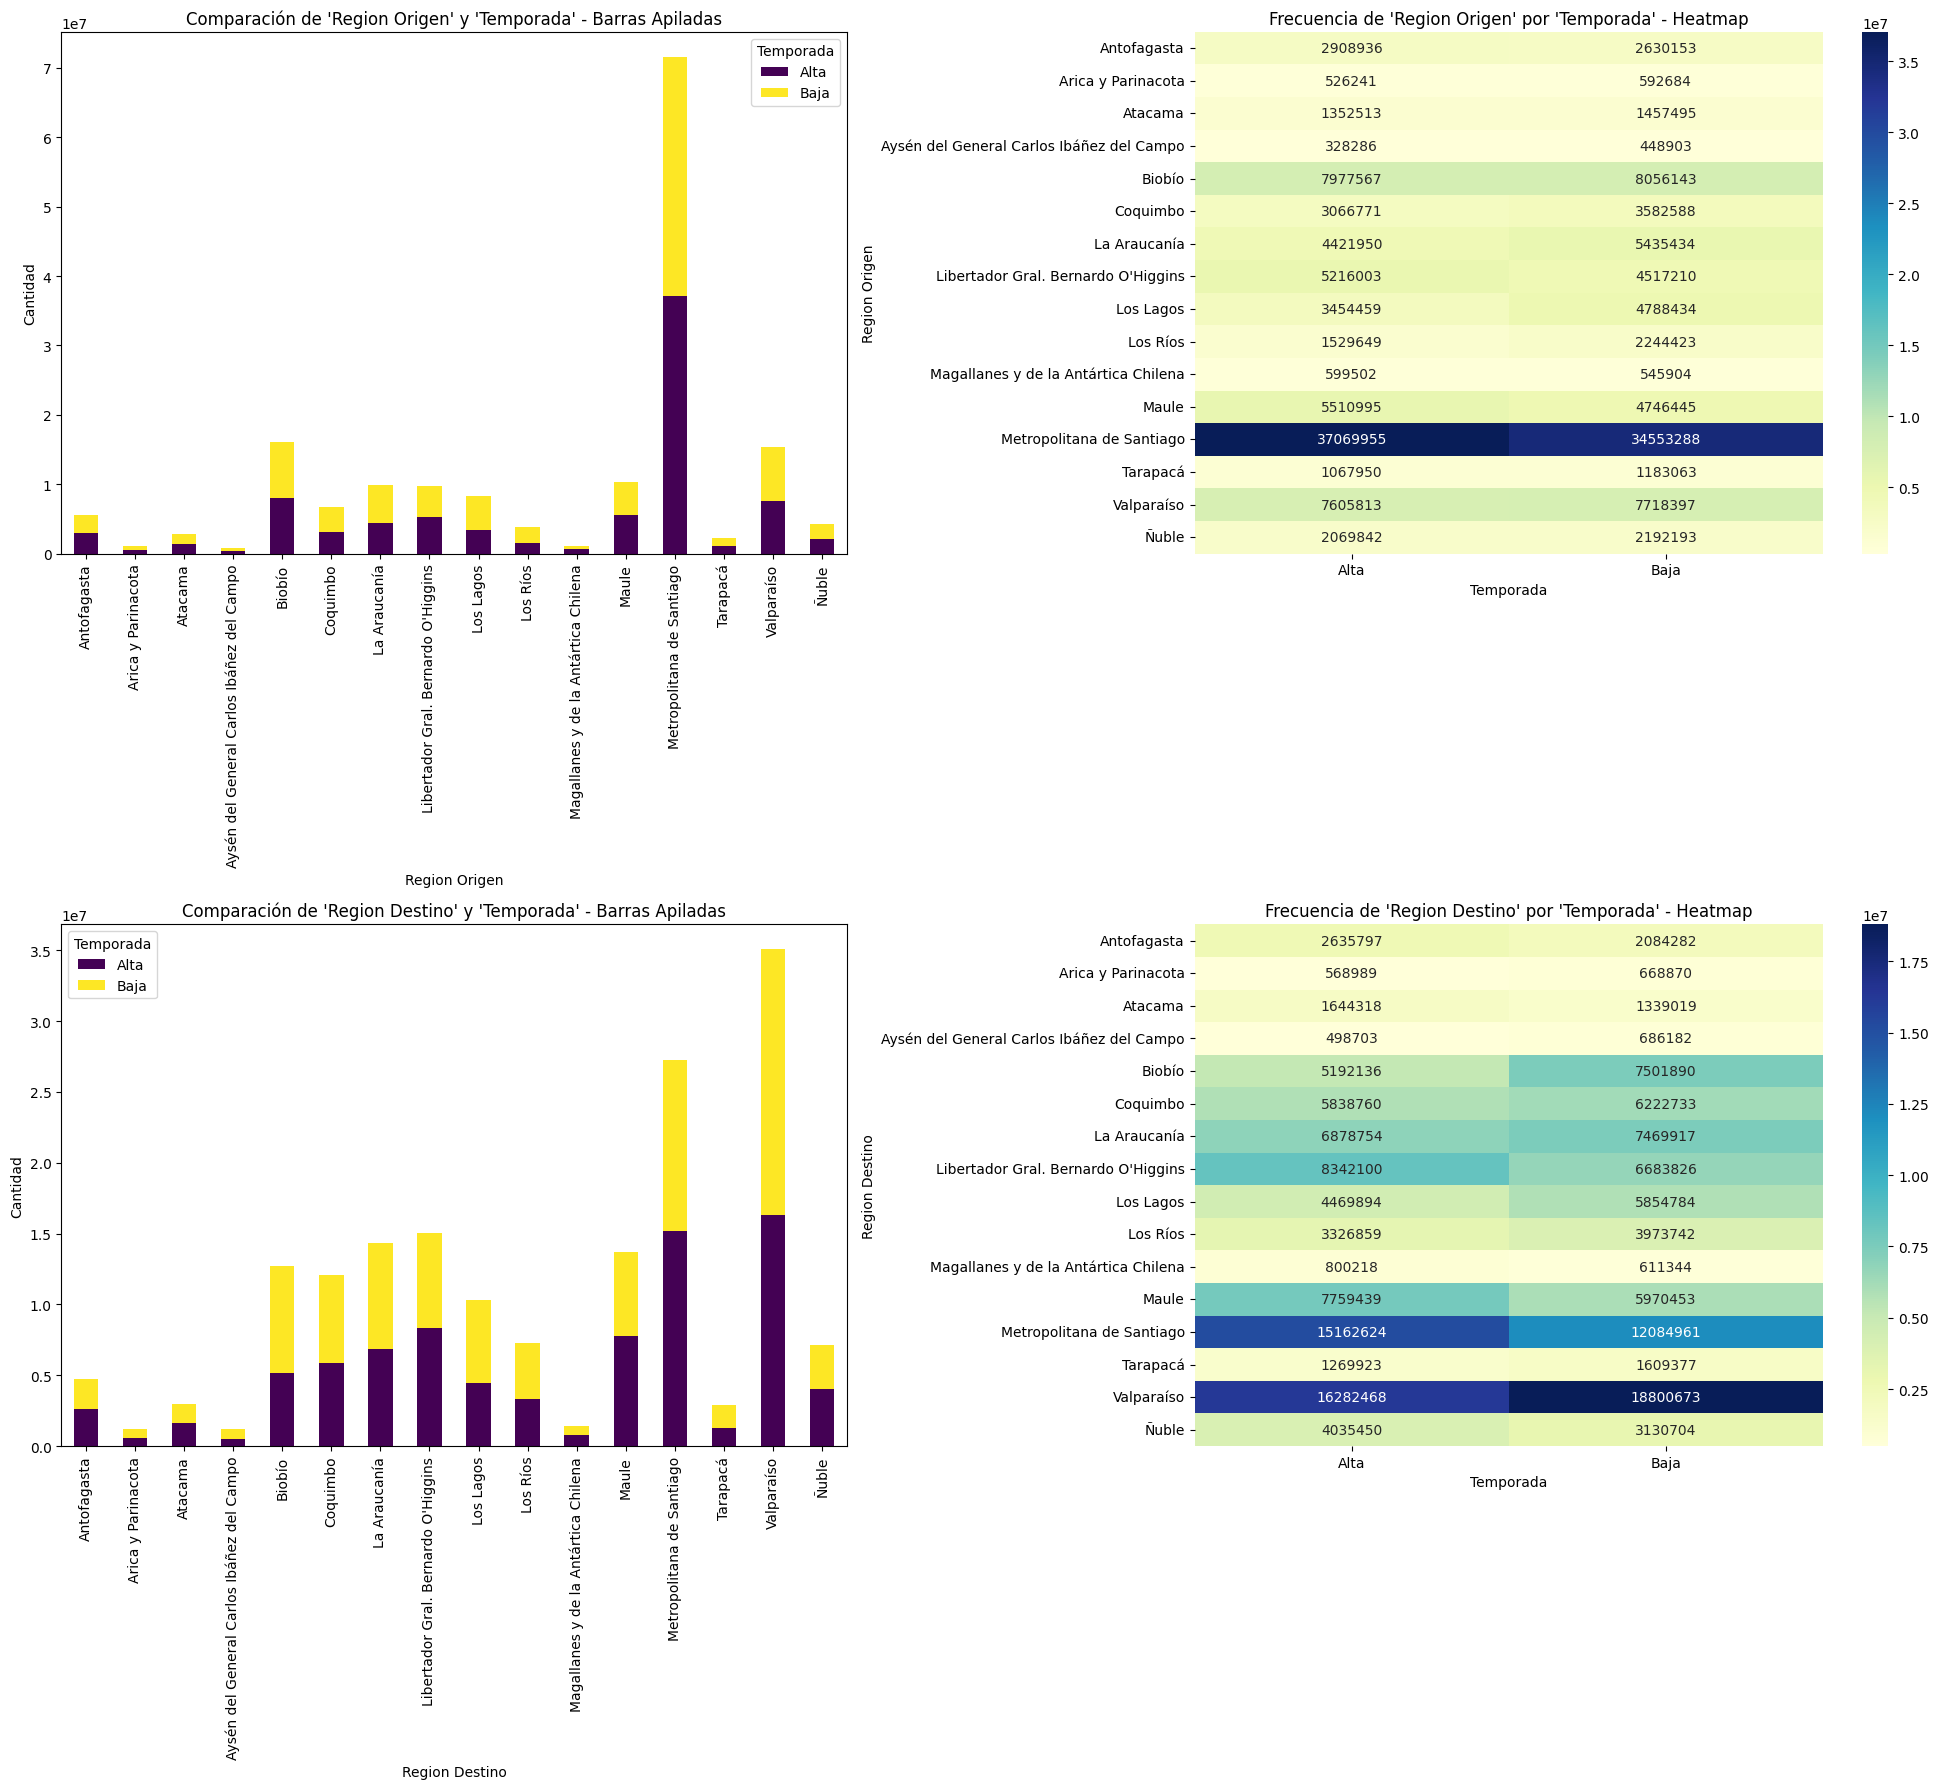

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 18))

# Región Origen - Temporada
df_pivot = df.pivot_table(values='Viajes Ocasionales', index='Region Origen', columns='Temporada', aggfunc='sum').fillna(0)
df_pivot.plot(kind='bar', stacked=True, ax=axes[0, 0], colormap='viridis')
axes[0, 0].set_title("Comparación de 'Region Origen' y 'Temporada' - Barras Apiladas")
axes[0, 0].set_xlabel("Region Origen")
axes[0, 0].set_ylabel("Cantidad")
axes[0, 0].legend(title="Temporada")

heatmap_data = df.pivot_table(values='Viajes Ocasionales', index='Region Origen', columns='Temporada', aggfunc='sum').fillna(0)
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".0f", ax=axes[0, 1])
axes[0, 1].set_title("Frecuencia de 'Region Origen' por 'Temporada' - Heatmap")
axes[0, 1].set_xlabel("Temporada")
axes[0, 1].set_ylabel("Region Origen")

# Región Destino - Temporada
df_pivot = df.pivot_table(values='Viajes Ocasionales', index='Region Destino', columns='Temporada', aggfunc='sum').fillna(0)
df_pivot.plot(kind='bar', stacked=True, ax=axes[1, 0], colormap='viridis')
axes[1, 0].set_title("Comparación de 'Region Destino' y 'Temporada' - Barras Apiladas")
axes[1, 0].set_xlabel("Region Destino")
axes[1, 0].set_ylabel("Cantidad")
axes[1, 0].legend(title="Temporada")

heatmap_data = df.pivot_table(values='Viajes Ocasionales', index='Region Destino', columns='Temporada', aggfunc='sum').fillna(0)
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".0f", ax=axes[1, 1])
axes[1, 1].set_title("Frecuencia de 'Region Destino' por 'Temporada' - Heatmap")
axes[1, 1].set_xlabel("Temporada")
axes[1, 1].set_ylabel("Region Destino")

plt.tight_layout()
plt.show()

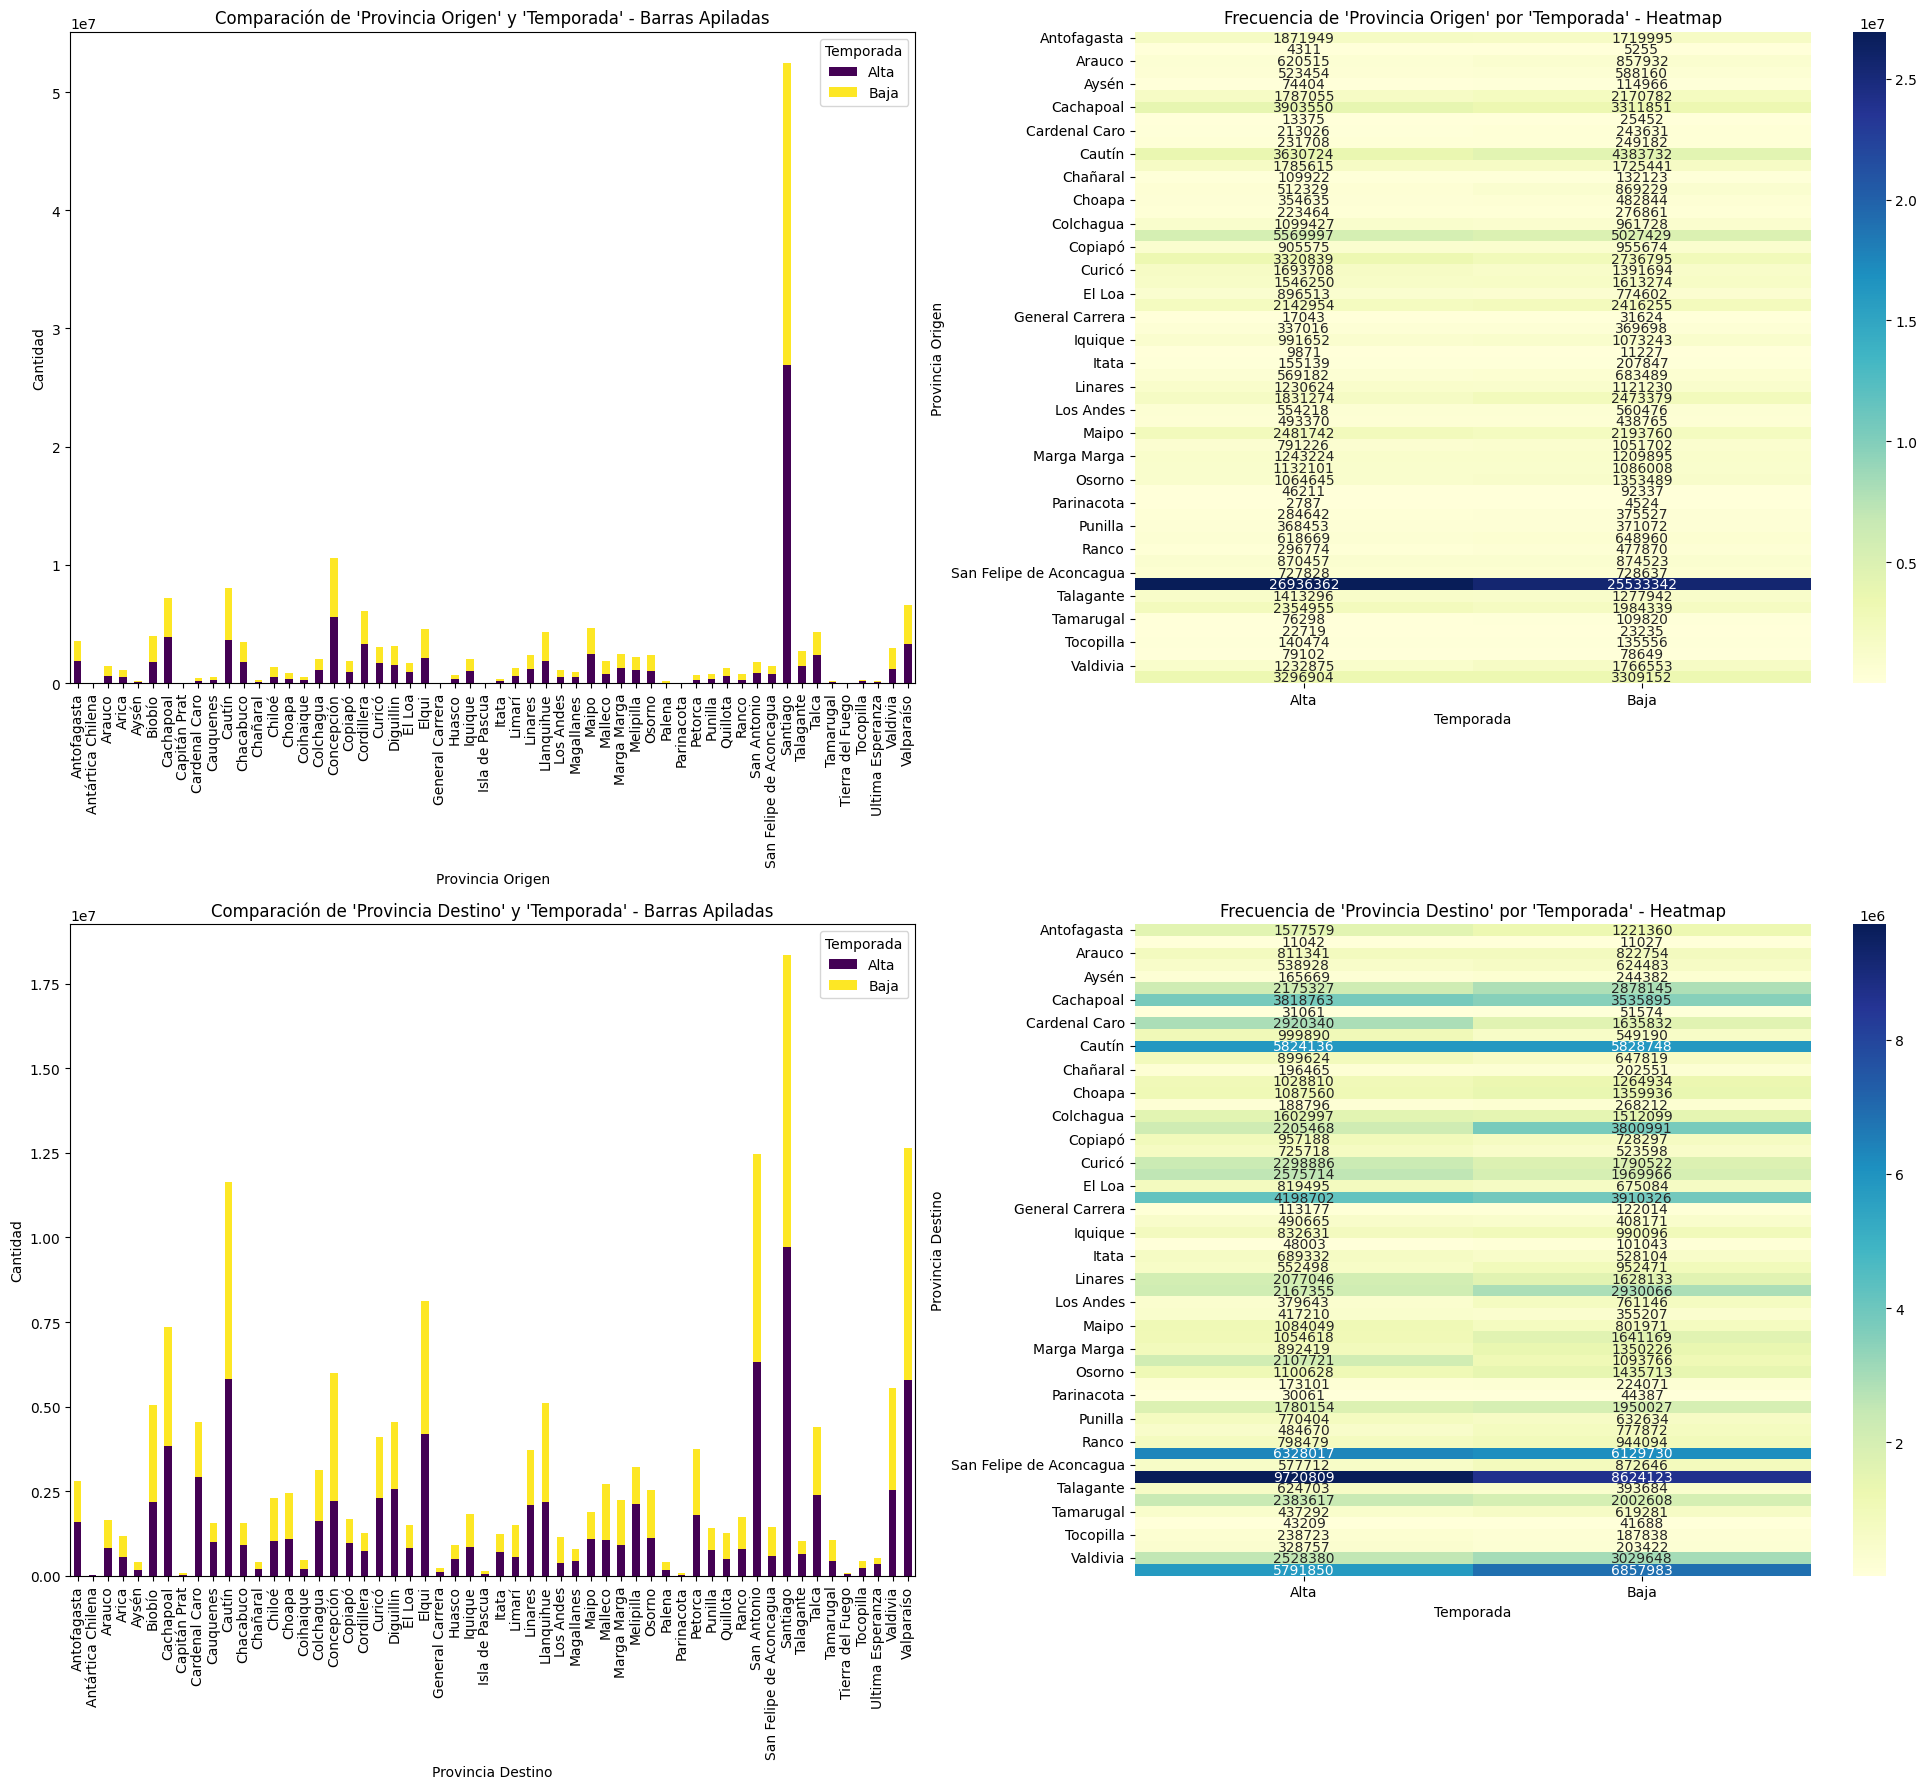

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 18))

# Provincia Origen - Temporada
df_pivot = df.pivot_table(values='Viajes Ocasionales', index='Provincia Origen', columns='Temporada', aggfunc='sum').fillna(0)
df_pivot.plot(kind='bar', stacked=True, ax=axes[0, 0], colormap='viridis')
axes[0, 0].set_title("Comparación de 'Provincia Origen' y 'Temporada' - Barras Apiladas")
axes[0, 0].set_xlabel("Provincia Origen")
axes[0, 0].set_ylabel("Cantidad")
axes[0, 0].legend(title="Temporada")

heatmap_data = df.pivot_table(values='Viajes Ocasionales', index='Provincia Origen', columns='Temporada', aggfunc='sum').fillna(0)
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".0f", ax=axes[0, 1])
axes[0, 1].set_title("Frecuencia de 'Provincia Origen' por 'Temporada' - Heatmap")
axes[0, 1].set_xlabel("Temporada")
axes[0, 1].set_ylabel("Provincia Origen")

# Provincia Destino - Temporada
df_pivot = df.pivot_table(values='Viajes Ocasionales', index='Provincia Destino', columns='Temporada', aggfunc='sum').fillna(0)
df_pivot.plot(kind='bar', stacked=True, ax=axes[1, 0], colormap='viridis')
axes[1, 0].set_title("Comparación de 'Provincia Destino' y 'Temporada' - Barras Apiladas")
axes[1, 0].set_xlabel("Provincia Destino")
axes[1, 0].set_ylabel("Cantidad")
axes[1, 0].legend(title="Temporada")

heatmap_data = df.pivot_table(values='Viajes Ocasionales', index='Provincia Destino', columns='Temporada', aggfunc='sum').fillna(0)
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".0f", ax=axes[1, 1])
axes[1, 1].set_title("Frecuencia de 'Provincia Destino' por 'Temporada' - Heatmap")
axes[1, 1].set_xlabel("Temporada")
axes[1, 1].set_ylabel("Provincia Destino")

plt.tight_layout()
plt.show()

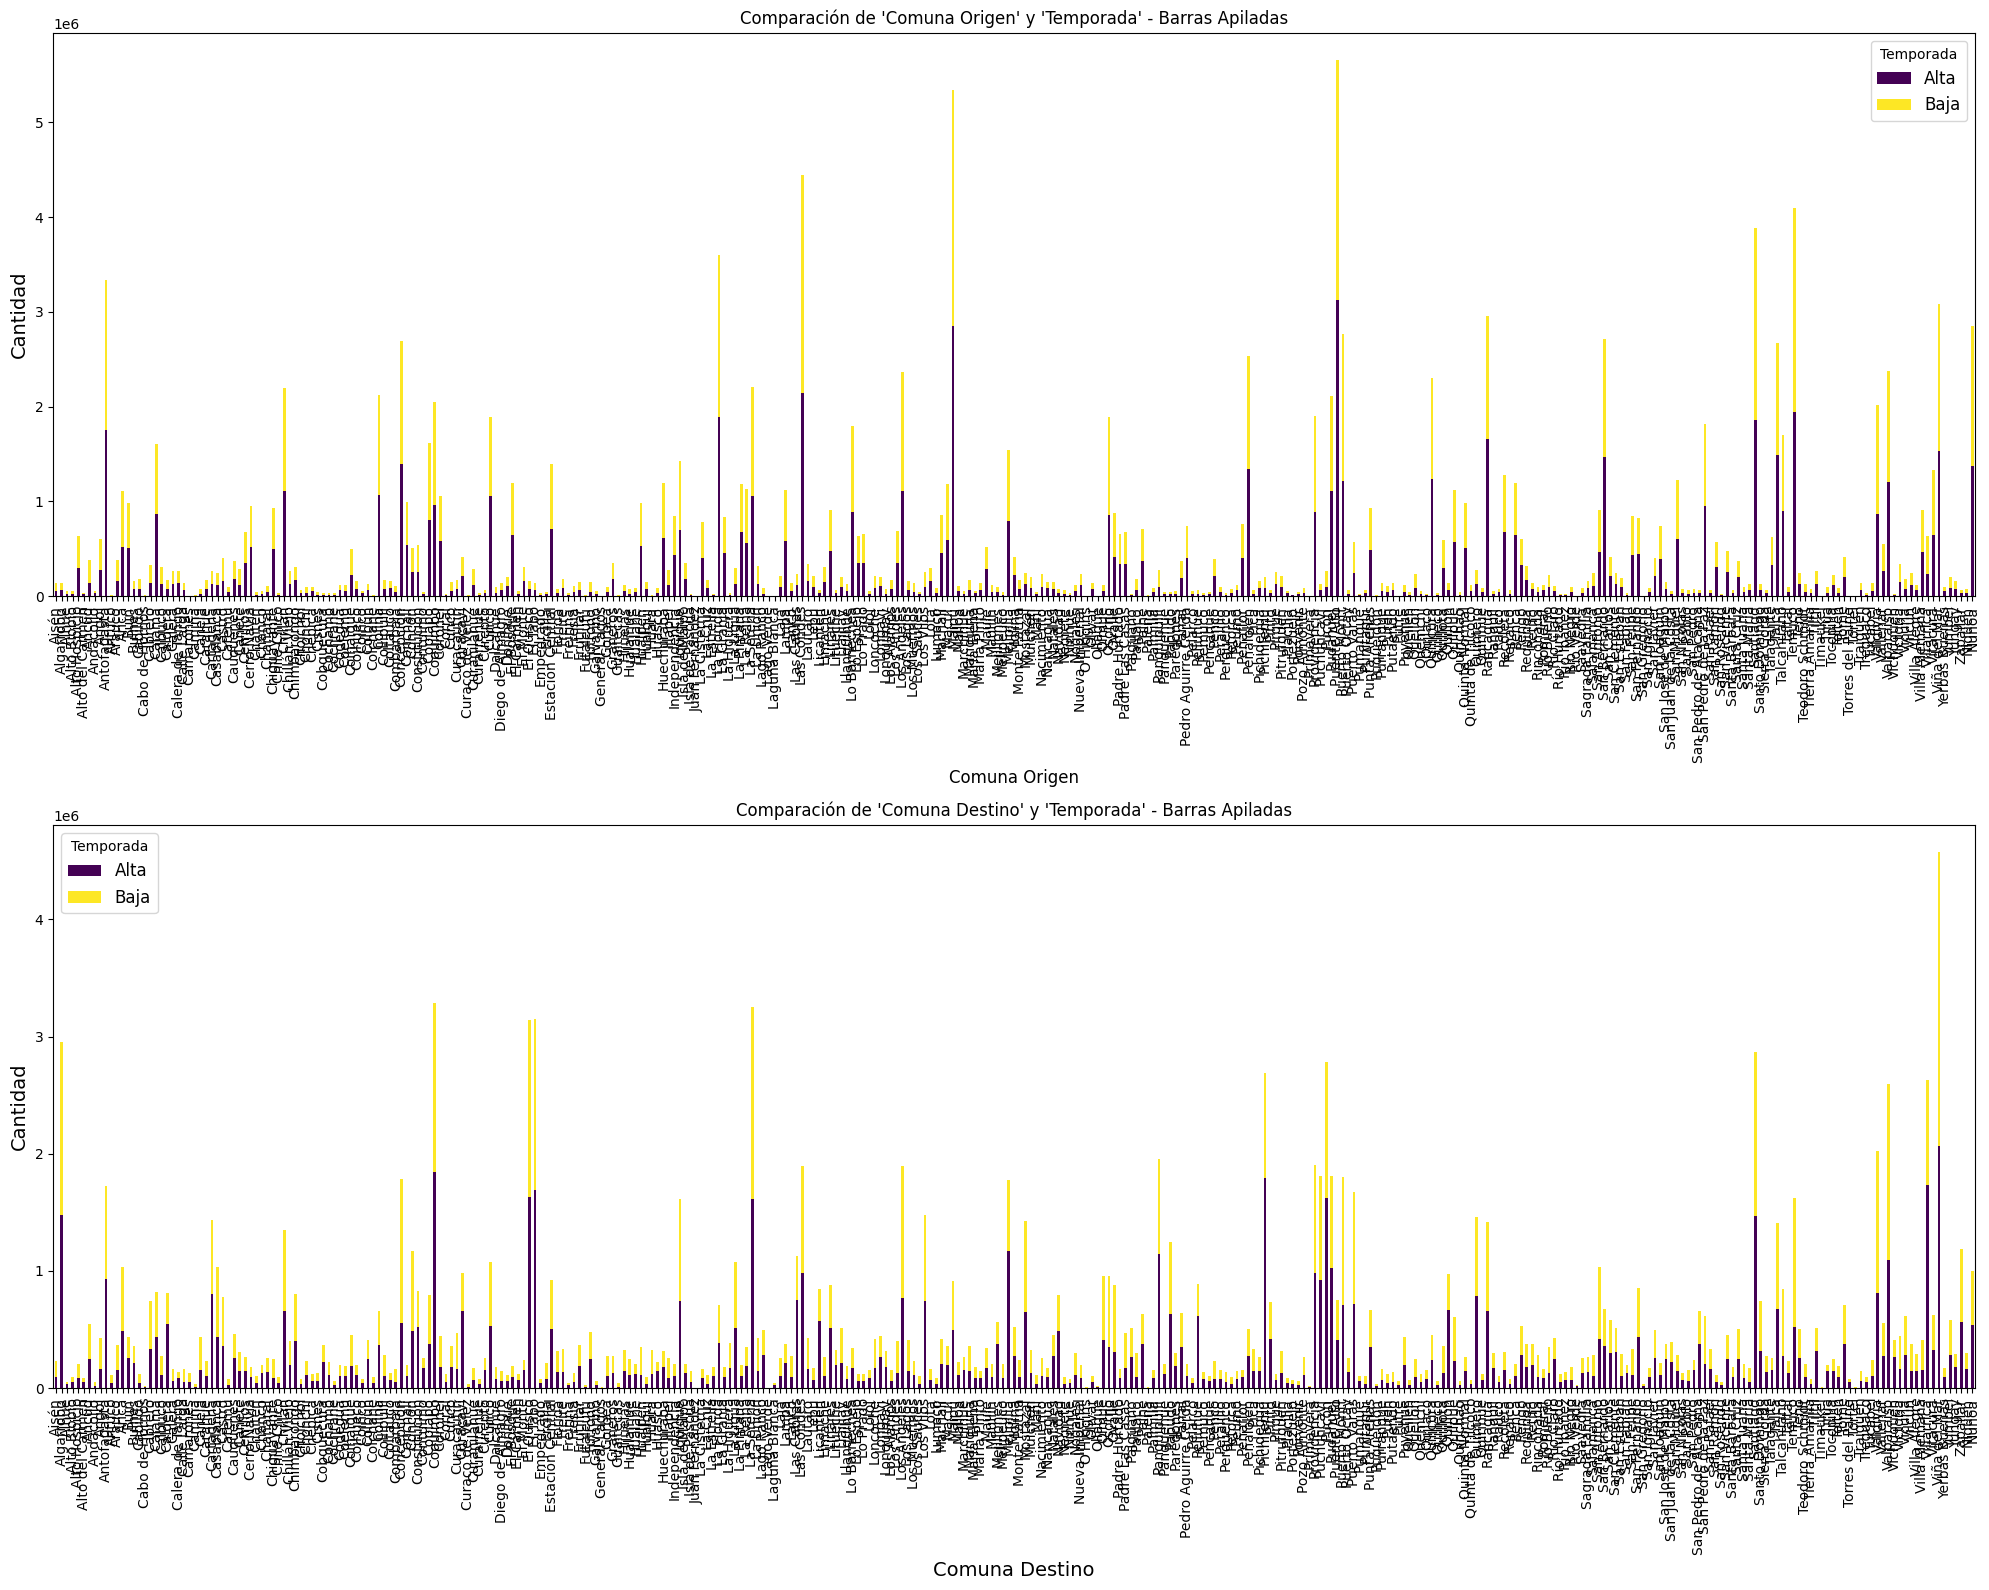

In [98]:
fig, axes = plt.subplots(2, 1, figsize=(20, 16))

# Comuna Origen - Temporada
df_pivot = df.pivot_table(values='Viajes Ocasionales', index='Comuna Origen', columns='Temporada', aggfunc='sum').fillna(0)
df_pivot.plot(kind='bar', stacked=True, ax=axes[0], colormap='viridis')
axes[0].set_title("Comparación de 'Comuna Origen' y 'Temporada' - Barras Apiladas")
axes[0].set_xlabel('Comuna Origen', fontsize=12) 
axes[0].set_ylabel("Cantidad", fontsize=14)
axes[0].legend(title="Temporada", fontsize=12)

# Comuna Destino - Temporada
df_pivot = df.pivot_table(values='Viajes Ocasionales', index='Comuna Destino', columns='Temporada', aggfunc='sum').fillna(0)
df_pivot.plot(kind='bar', stacked=True, ax=axes[1], colormap='viridis')
axes[1].set_title("Comparación de 'Comuna Destino' y 'Temporada' - Barras Apiladas")
axes[1].set_xlabel("Comuna Destino", fontsize=14) 
axes[1].set_ylabel("Cantidad", fontsize=14) 
axes[1].legend(title="Temporada", fontsize=12)

plt.tight_layout()
plt.show()


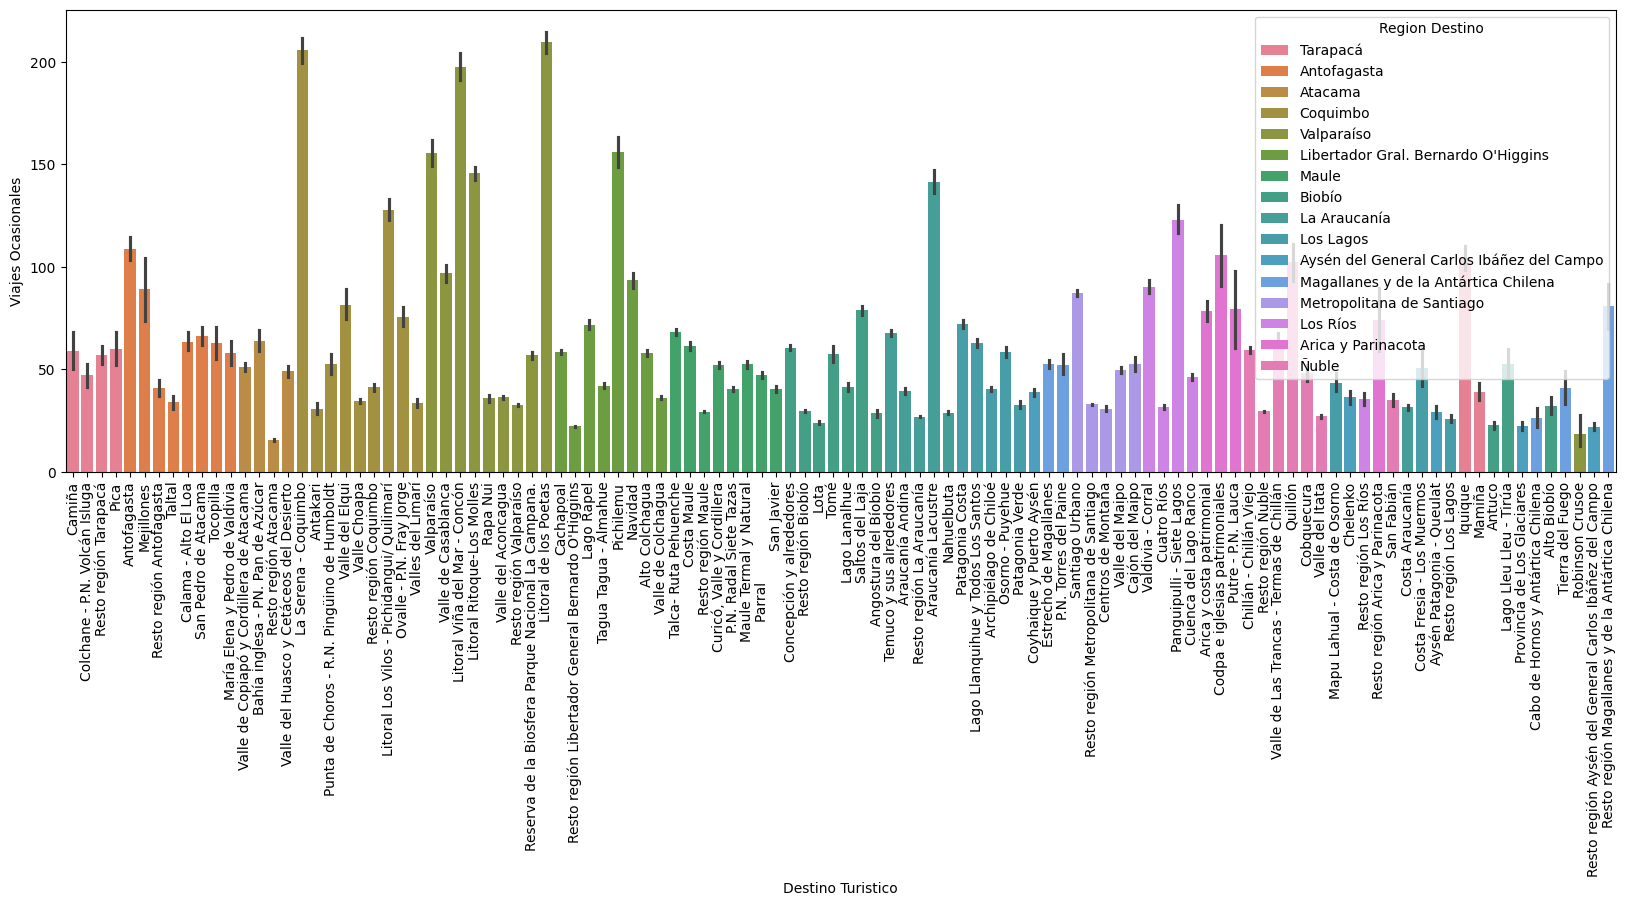

In [ ]:
# Viajes Ocasionales por Destino Turistico y Region Destino
plt.figure(figsize=(20, 6))
sns.barplot(data=df, x='Destino Turistico', y='Viajes Ocasionales', hue='Region Destino')
plt.xticks(rotation=90)

plt.show()

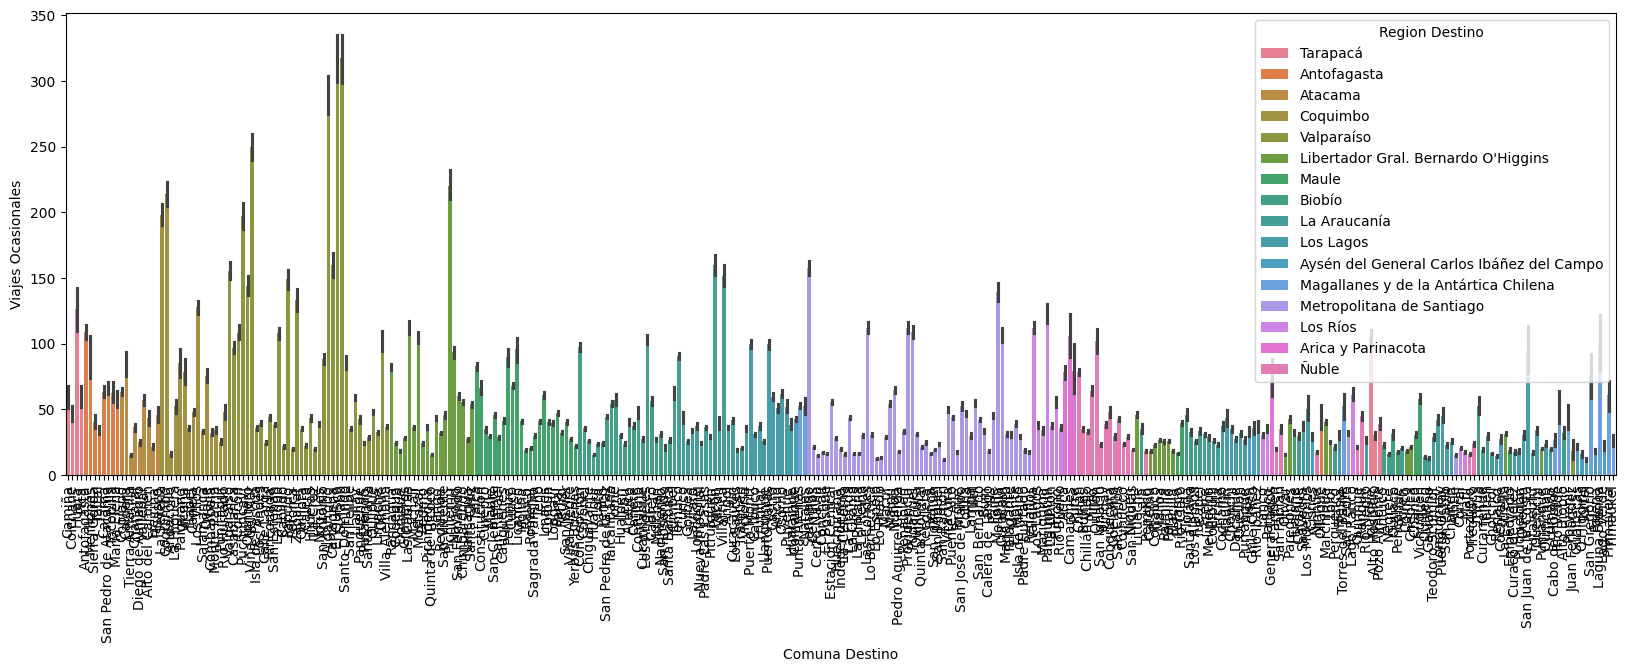

In [104]:
plt.figure(figsize=(20, 6))
sns.barplot(data=df, x='Comuna Destino', y='Viajes Ocasionales', hue='Region Destino')
plt.xticks(rotation=90)

plt.show()

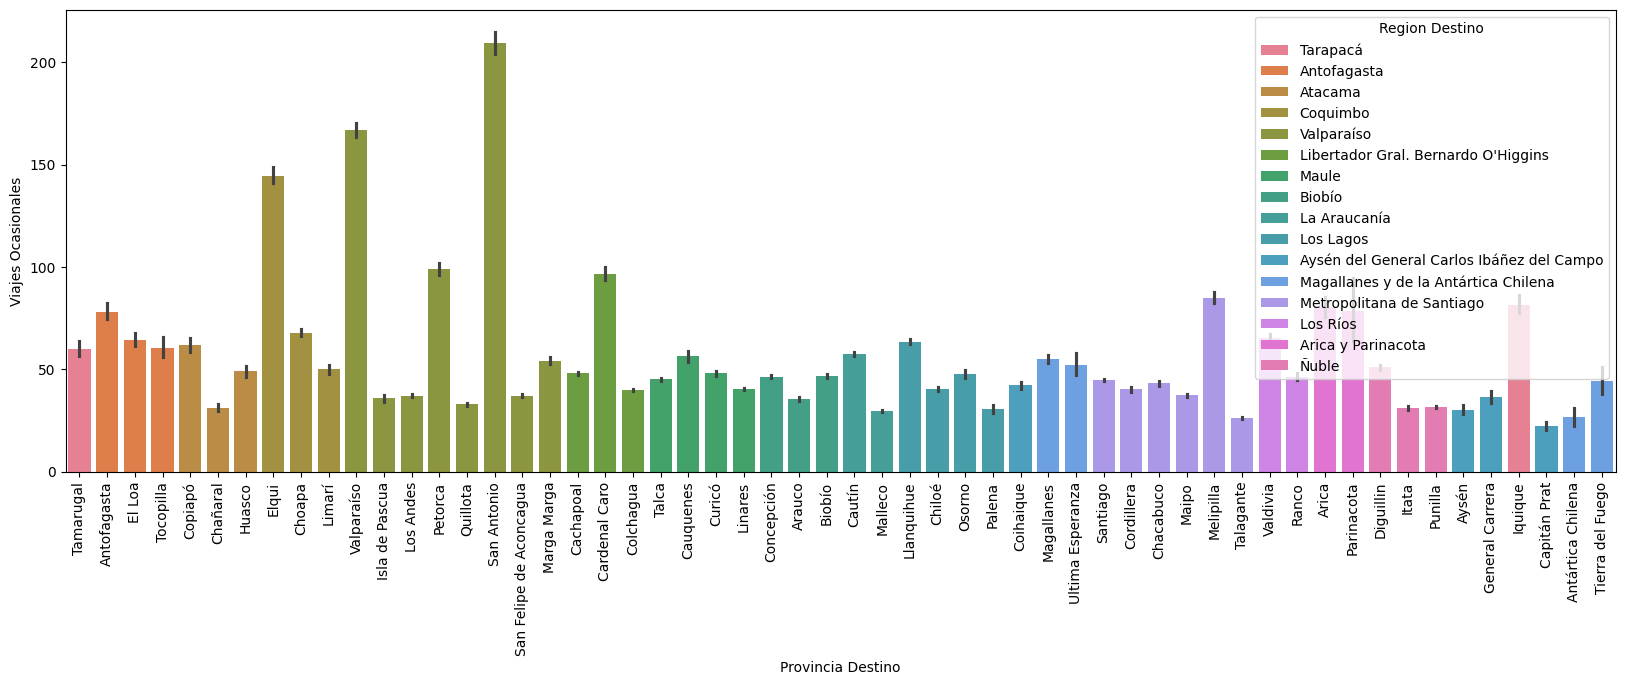

In [106]:
plt.figure(figsize=(20, 6))
sns.barplot(data=df, x='Provincia Destino', y='Viajes Ocasionales', hue='Region Destino')
plt.xticks(rotation=90)

plt.show()

/var/folders/3p/lzyp6b9542b_8mk_q04l5p100000gn/T/ipykernel_10309/425457978.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp['Fecha'] = pd.to_datetime(dfp[['Anio', 'CUT Mes']].astype(str).agg('-'.join, axis=1), format='%Y-%m')


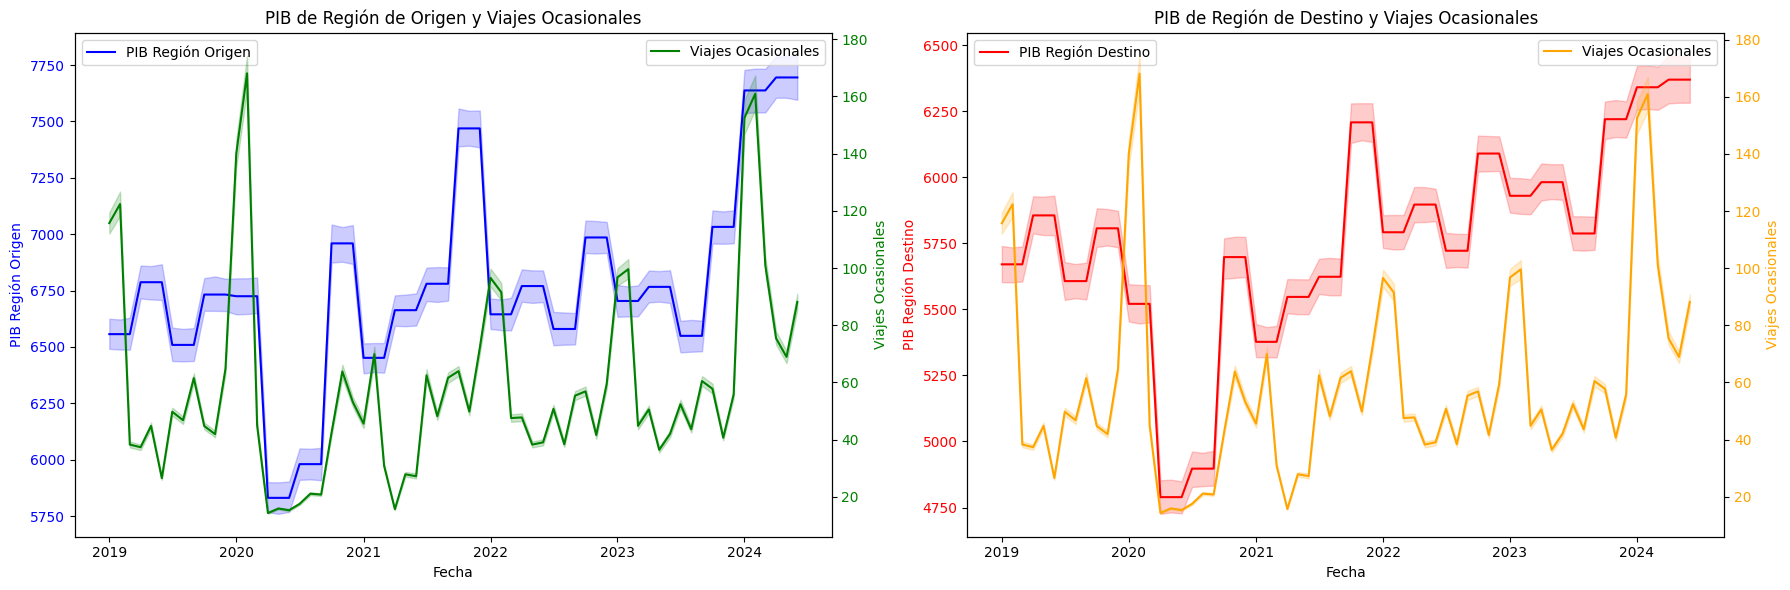

In [75]:
dfp = df[['Anio','CUT Mes','PIB Region Origen', 'PIB Region Destino', 'Viajes Ocasionales']]

# Asegurarnos de que 'Anio' y 'CUT Mes' existan y sean numéricos
dfp['Fecha'] = pd.to_datetime(dfp[['Anio', 'CUT Mes']].astype(str).agg('-'.join, axis=1), format='%Y-%m')

# Crear la figura y los subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Primer gráfico: PIB Región Origen y Viajes Ocasionales en el primer subplot (ax1)
sns.lineplot(data=dfp, x='Fecha', y='PIB Region Origen', ax=ax1, color='b', label='PIB Región Origen')
ax1.set_ylabel('PIB Región Origen', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Creamos un segundo eje Y para los Viajes Ocasionales en el primer subplot
ax2_1 = ax1.twinx()
sns.lineplot(data=dfp, x='Fecha', y='Viajes Ocasionales', ax=ax2_1, color='g', label='Viajes Ocasionales')
ax2_1.set_ylabel('Viajes Ocasionales', color='g')
ax2_1.tick_params(axis='y', labelcolor='g')

ax1.set_title("PIB de Región de Origen y Viajes Ocasionales")
ax1.set_xlabel('Fecha')

# Segundo gráfico: PIB Región Destino y Viajes Ocasionales en el segundo subplot (ax2)
sns.lineplot(data=dfp, x='Fecha', y='PIB Region Destino', ax=ax2, color='r', label='PIB Región Destino')
ax2.set_ylabel('PIB Región Destino', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Creamos un segundo eje Y para los Viajes Ocasionales en el segundo subplot
ax2_2 = ax2.twinx()
sns.lineplot(data=dfp, x='Fecha', y='Viajes Ocasionales', ax=ax2_2, color='orange', label='Viajes Ocasionales')
ax2_2.set_ylabel('Viajes Ocasionales', color='orange')
ax2_2.tick_params(axis='y', labelcolor='orange')

ax2.set_title("PIB de Región de Destino y Viajes Ocasionales")
ax2.set_xlabel('Fecha')

# Ajustamos el layout para que no se solapen los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


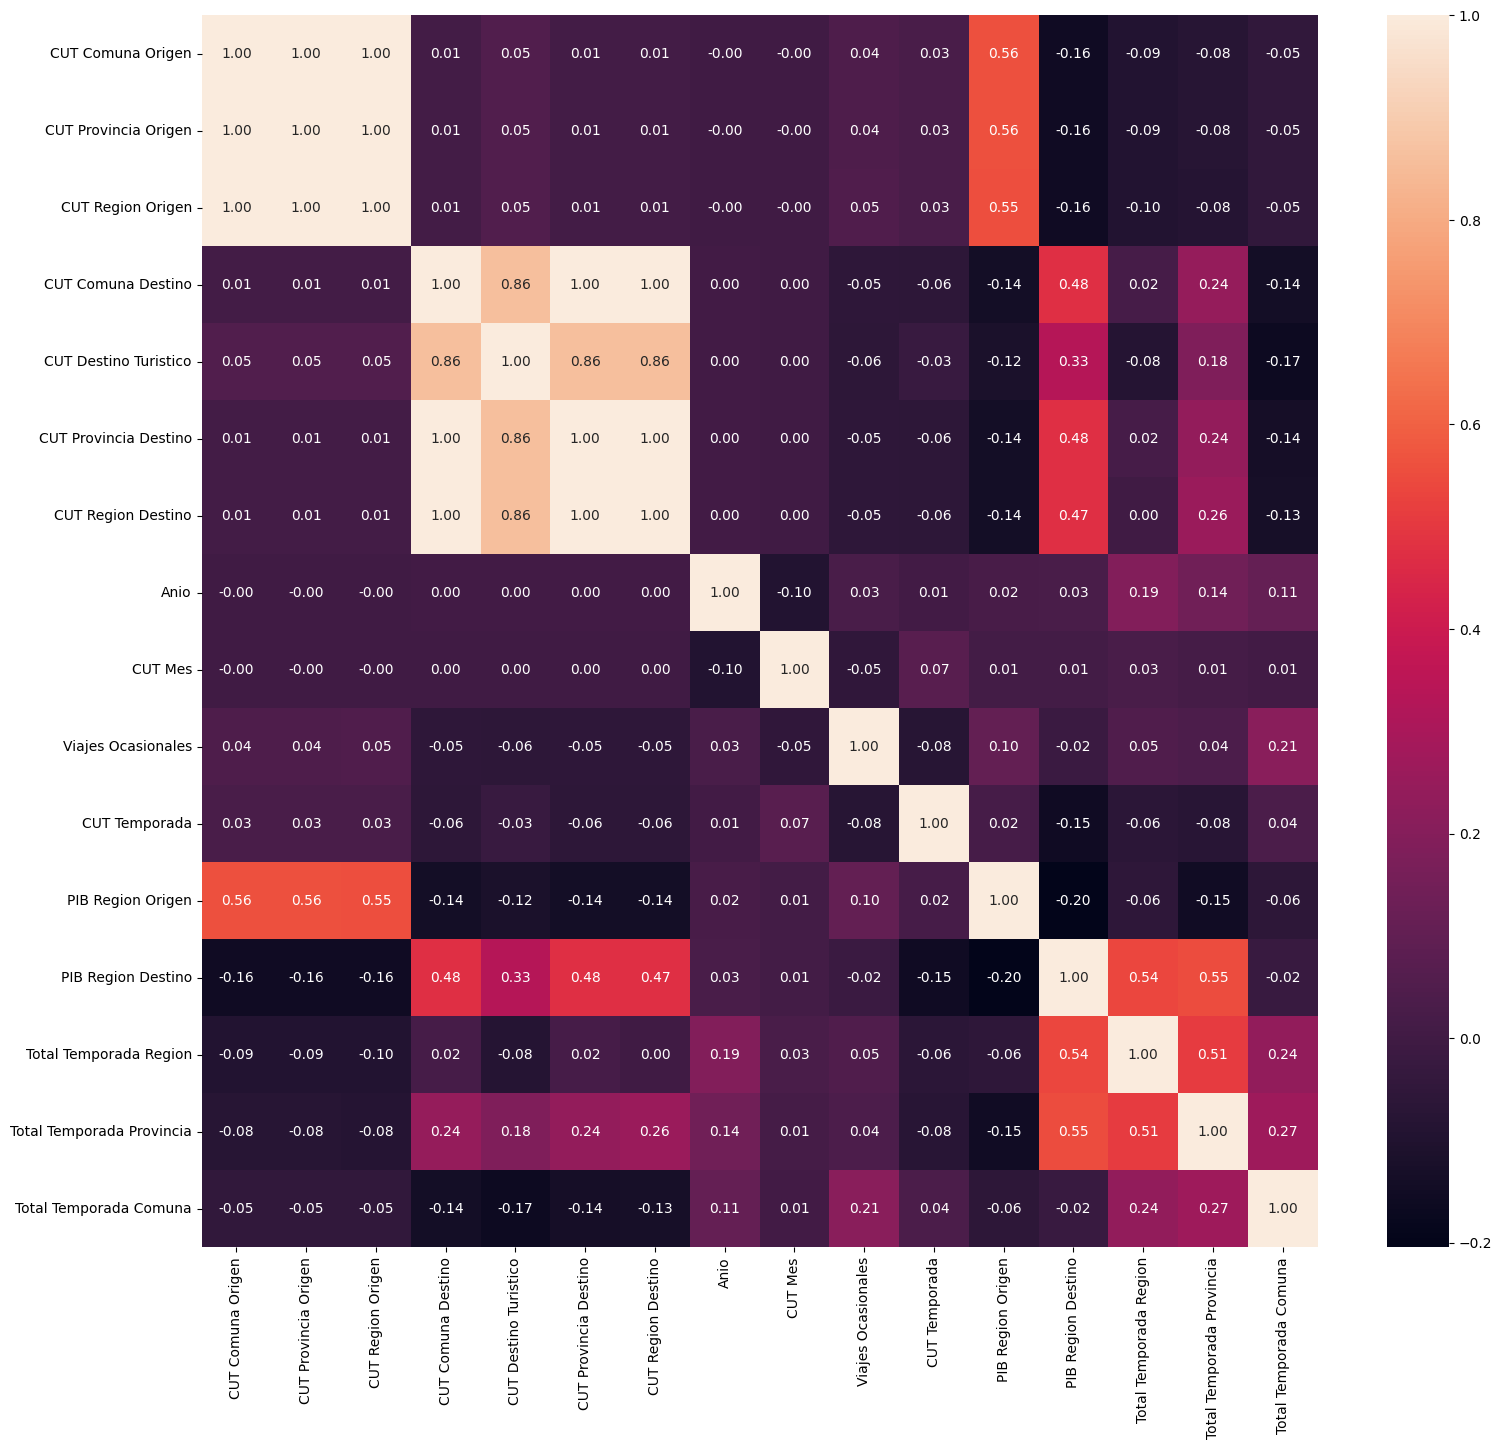

In [ ]:
df_corr= df.drop(['Comuna Origen', 'Provincia Origen', 'Region Origen', 'Comuna Destino', 'Destino Turistico', 'Provincia Destino', 'Region Destino', 'Mes', 'Temporada'],axis=1)
df_corr

plt.figure(figsize=(18, 16))
sns.heatmap(df_corr.corr(),annot=True,fmt=".2f")
plt.show()

In [ ]:
sns.pairplot(df_corr, kind='scatter', plot_kws={'alpha': 0.6})
plt.show()

In [107]:
# Ingeniría de Características

df.describe()

,CUT Comuna Origen,CUT Provincia Origen,CUT Region Origen,CUT Comuna Destino,CUT Destino Turistico,CUT Provincia Destino,CUT Region Destino,Anio,CUT Mes,Viajes Ocasionales,CUT Temporada,PIB Region Origen,PIB Region Destino,Total Temporada Region,Total Temporada Provincia,Total Temporada Comuna
count,2.952624e+06,2.952624e+06,2.952624e+06,2.952624e+06,2.952624e+06,2.952624e+06,2.952624e+06,2.952624e+06,2.952624e+06,2.952624e+06,2.952624e+06,2.952624e+06,2.952624e+06,2.952624e+06,2.952624e+06,2.952624e+06
mean,9.252812e+03,9.246212e+01,9.026856e+00,9.194516e+03,5.411677e+01,9.188172e+01,8.970835e+00,2.021311e+03,6.312101e+00,5.737242e+01,6.490603e-01,6.752792e+03,5.770869e+03,1.599657e+06,6.123443e+05,6.544223e+04
std,3.774158e+03,3.772225e+01,3.802146e+00,3.765241e+03,2.164901e+01,3.763625e+01,3.795342e+00,1.541107e+00,3.446936e+00,2.221494e+02,4.772642e-01,8.051928e+03,7.519412e+03,1.010350e+06,5.708988e+05,7.630416e+04
min,1.101000e+03,1.100000e+01,1.000000e+00,1.101000e+03,0.000000e+00,1.100000e+01,1.000000e+00,2.019000e+03,1.000000e+00,1.000000e+00,0.000000e+00,2.697575e+02,2.697575e+02,2.603800e+04,1.860000e+02,7.000000e+01
25%,6.113000e+03,6.100000e+01,6.000000e+00,6.115000e+03,3.500000e+01,6.100000e+01,6.000000e+00,2.020000e+03,3.000000e+00,6.000000e+00,0.000000e+00,1.567639e+03,1.485615e+03,8.698860e+05,1.919040e+05,1.936700e+04
50%,8.307000e+03,8.300000e+01,8.000000e+00,8.314000e+03,5.800000e+01,8.300000e+01,8.000000e+00,2.021000e+03,6.000000e+00,1.300000e+01,1.000000e+00,2.312617e+03,2.011499e+03,1.324967e+06,3.895310e+05,3.719000e+04
75%,1.311800e+04,1.310000e+02,1.300000e+01,1.311400e+04,7.100000e+01,1.310000e+02,1.300000e+01,2.023000e+03,9.000000e+00,3.700000e+01,1.000000e+00,1.651618e+04,3.718329e+03,2.316071e+06,8.339650e+05,7.514000e+04
max,1.630500e+04,1.630000e+02,1.600000e+01,1.630500e+04,1.070000e+02,1.630000e+02,1.600000e+01,2.024000e+03,1.200000e+01,2.185900e+04,1.000000e+00,2.261309e+04,2.261309e+04,4.664627e+06,2.296075e+06,6.559690e+05


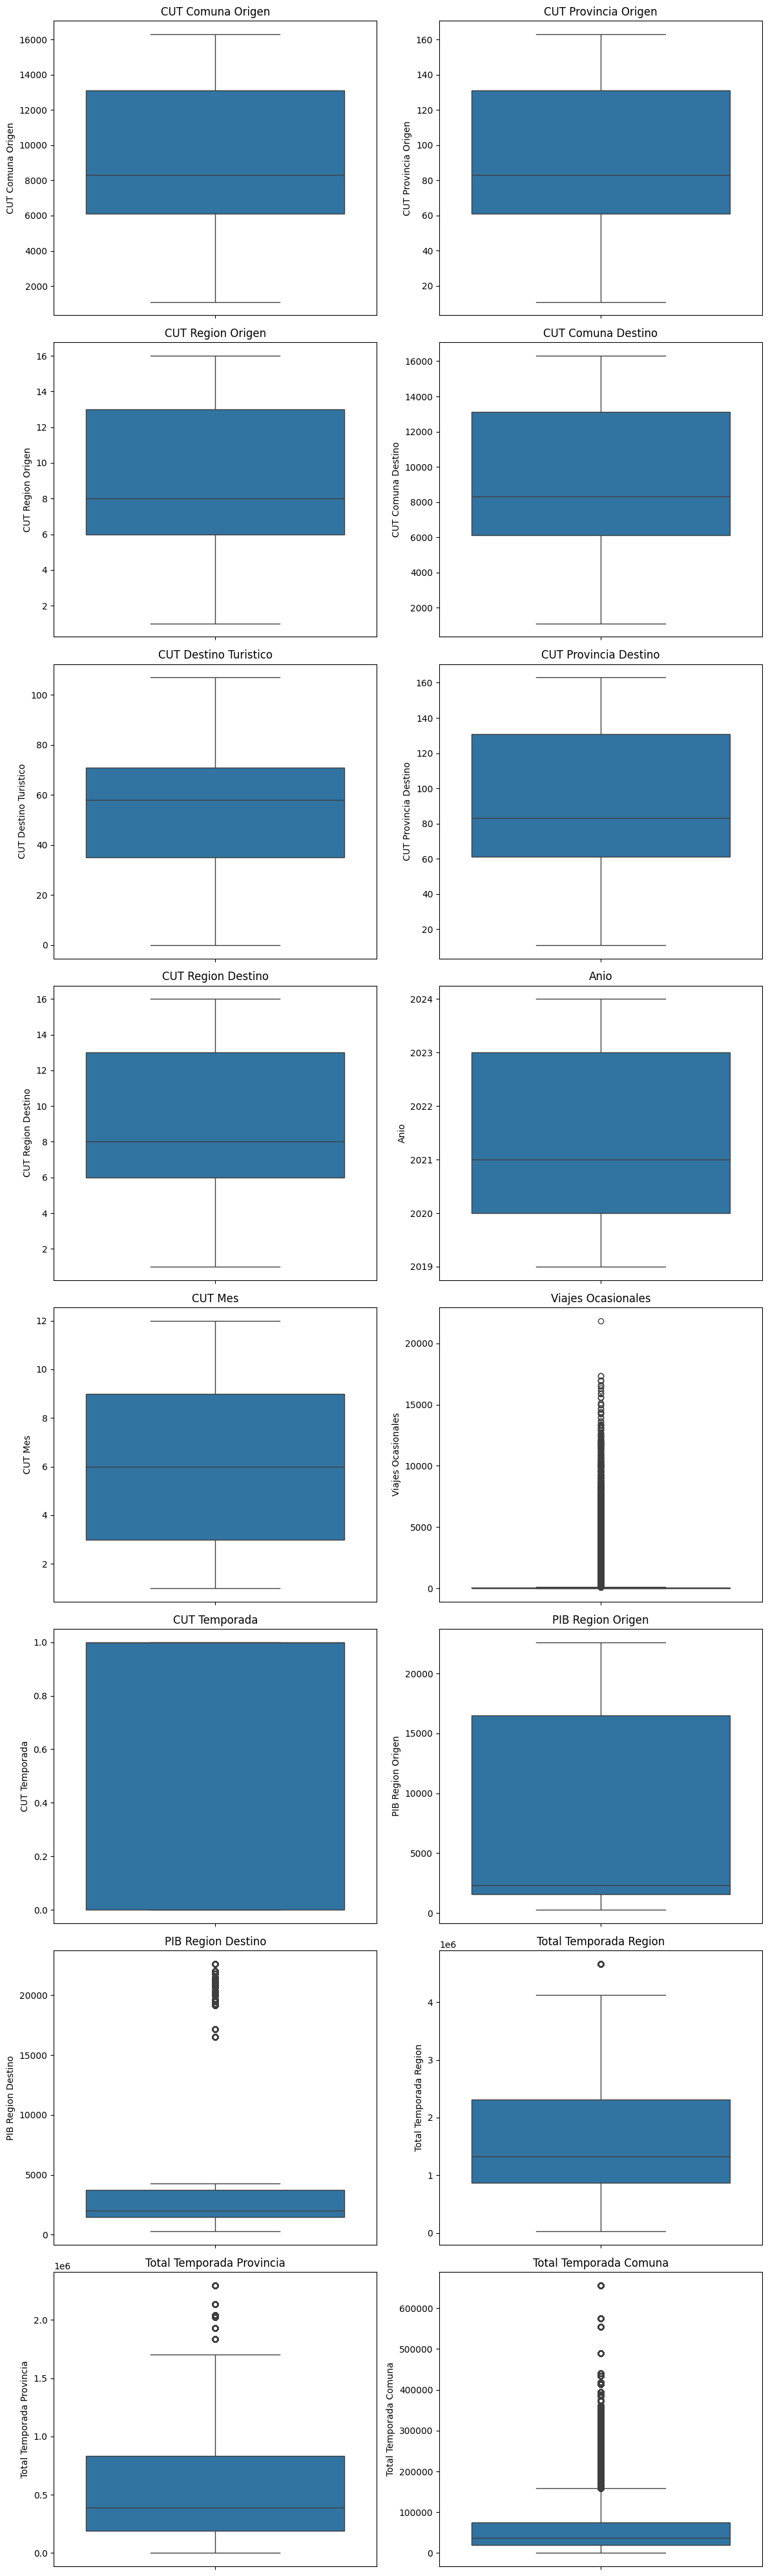

In [162]:
def plot_numerical_boxplots(df):
  
    numerical_cols = df.select_dtypes(include=['number']).columns
    num_plots = len(numerical_cols)
    
    n_cols = 2 
    n_rows = (num_plots + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
      sns.boxplot(y=df[col], ax=axes[i])
      axes[i].set_title(f'{col}')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_numerical_boxplots(df)

In [148]:
# Análisis Outliers en la variable 'Viajes Ocasionales'

def analisis_ric(columna,df):
    estadisticas = df[columna].describe()
    ric = estadisticas['75%'] - estadisticas['25%']
    lim_sup = estadisticas['75%'] + 1.5*ric
    lim_inf = estadisticas['25%'] - 1.5*ric
    print(f'\nRango Intercuratílico: {ric}')
    print(f'Límite superior: {lim_sup} \nLímite inferior: {lim_inf}')

print(df['Viajes Ocasionales'].describe())

col_a_analizar = 'Viajes Ocasionales'

analisis_ric(col_a_analizar,df)

print('\n',df[df[col_a_analizar]>=200].count())
print('\n',df[df[col_a_analizar]<0].count())

count    2.952624e+06
mean     5.737242e+01
std      2.221494e+02
min      1.000000e+00
25%      6.000000e+00
50%      1.300000e+01
75%      3.700000e+01
max      2.185900e+04
Name: Viajes Ocasionales, dtype: float64

Rango Intercuratílico: 31.0
Límite superior: 83.5 
Límite inferior: -40.5

 CUT Comuna Origen            159642
Comuna Origen                159642
CUT Provincia Origen         159642
Provincia Origen             159642
CUT Region Origen            159642
Region Origen                159642
CUT Comuna Destino           159642
Comuna Destino               159642
CUT Destino Turistico        159642
Destino Turistico            159642
CUT Provincia Destino        159642
Provincia Destino            159642
CUT Region Destino           159642
Region Destino               159642
Anio                         159642
CUT Mes                      159642
Mes                          159642
Viajes Ocasionales           159642
CUT Temporada                159642
Temporada             

In [ ]:
# Análisis Outliers en la variable 'PIB Region Destino'
col_a_analizar = 'PIB Region Destino'

print(df[col_a_analizar].describe())

analisis_ric(col_a_analizar,df)

print('\n',df[df[col_a_analizar]>=2067].count())
print('\n',df[df[col_a_analizar]<0].count())

count    2.952624e+06
mean     5.770869e+03
std      7.519412e+03
min      2.697575e+02
25%      1.485615e+03
50%      2.011499e+03
75%      3.718329e+03
max      2.261309e+04
Name: PIB Region Destino, dtype: float64

Rango Intercuratílico: 2232.7138493054
Límite superior: 7067.399820378299 
Límite inferior: -1863.4555768433

 CUT Comuna Origen            1463211
Comuna Origen                1463211
CUT Provincia Origen         1463211
Provincia Origen             1463211
CUT Region Origen            1463211
Region Origen                1463211
CUT Comuna Destino           1463211
Comuna Destino               1463211
CUT Destino Turistico        1463211
Destino Turistico            1463211
CUT Provincia Destino        1463211
Provincia Destino            1463211
CUT Region Destino           1463211
Region Destino               1463211
Anio                         1463211
CUT Mes                      1463211
Mes                          1463211
Viajes Ocasionales           1463211
CUT T

In [ ]:
# Análisis Outliers en la variable 'Total Temporada Region'
col_a_analizar = 'Total Temporada Region'

print(df[col_a_analizar].describe())

analisis_ric(col_a_analizar,df)

print('\n',df[df[col_a_analizar]>=4000000].count())
print('\n',df[df[col_a_analizar]<0].count())

count    2.952624e+06
mean     1.599657e+06
std      1.010350e+06
min      2.603800e+04
25%      8.698860e+05
50%      1.324967e+06
75%      2.316071e+06
max      4.664627e+06
Name: Total Temporada Region, dtype: float64

Rango Intercuratílico: 1446185.0
Límite superior: 4485348.5 
Límite inferior: -1299391.5

 CUT Comuna Origen            115108
Comuna Origen                115108
CUT Provincia Origen         115108
Provincia Origen             115108
CUT Region Origen            115108
Region Origen                115108
CUT Comuna Destino           115108
Comuna Destino               115108
CUT Destino Turistico        115108
Destino Turistico            115108
CUT Provincia Destino        115108
Provincia Destino            115108
CUT Region Destino           115108
Region Destino               115108
Anio                         115108
CUT Mes                      115108
Mes                          115108
Viajes Ocasionales           115108
CUT Temporada                115108
Tem

In [ ]:
# Análisis Outliers en la variable 'Total Temporada Provincia'
col_a_analizar = 'Total Temporada Provincia'

print(df[col_a_analizar].describe())

analisis_ric(col_a_analizar,df)

print('\n',df[df[col_a_analizar]>=200000].count())
print('\n',df[df[col_a_analizar]<0].count())

count    2.952624e+06
mean     6.123443e+05
std      5.708988e+05
min      1.860000e+02
25%      1.919040e+05
50%      3.895310e+05
75%      8.339650e+05
max      2.296075e+06
Name: Total Temporada Provincia, dtype: float64

Rango Intercuratílico: 642061.0
Límite superior: 1797056.5 
Límite inferior: -771187.5

 CUT Comuna Origen            2173763
Comuna Origen                2173763
CUT Provincia Origen         2173763
Provincia Origen             2173763
CUT Region Origen            2173763
Region Origen                2173763
CUT Comuna Destino           2173763
Comuna Destino               2173763
CUT Destino Turistico        2173763
Destino Turistico            2173763
CUT Provincia Destino        2173763
Provincia Destino            2173763
CUT Region Destino           2173763
Region Destino               2173763
Anio                         2173763
CUT Mes                      2173763
Mes                          2173763
Viajes Ocasionales           2173763
CUT Temporada       

In [ ]:
# Análisis Outliers en la variable 'Total Temporada Comuna'
col_a_analizar = 'Total Temporada Comuna'

print(df[col_a_analizar].describe())

analisis_ric(col_a_analizar,df)

print('\n',df[df[col_a_analizar]>=200000].count())
print('\n',df[df[col_a_analizar]<0].count())

count    2.952624e+06
mean     6.544223e+04
std      7.630416e+04
min      7.000000e+01
25%      1.936700e+04
50%      3.719000e+04
75%      7.514000e+04
max      6.559690e+05
Name: Total Temporada Comuna, dtype: float64

Rango Intercuratílico: 55773.0
Límite superior: 158799.5 
Límite inferior: -64292.5

 CUT Comuna Origen            213520
Comuna Origen                213520
CUT Provincia Origen         213520
Provincia Origen             213520
CUT Region Origen            213520
Region Origen                213520
CUT Comuna Destino           213520
Comuna Destino               213520
CUT Destino Turistico        213520
Destino Turistico            213520
CUT Provincia Destino        213520
Provincia Destino            213520
CUT Region Destino           213520
Region Destino               213520
Anio                         213520
CUT Mes                      213520
Mes                          213520
Viajes Ocasionales           213520
CUT Temporada                213520
Temporad

In [127]:
df.isnull().sum().sort_values(ascending=False)

CUT Comuna Origen            0
Region Destino               0
Total Temporada Provincia    0
Total Temporada Region       0
PIB Region Destino           0
PIB Region Origen            0
Temporada                    0
CUT Temporada                0
Viajes Ocasionales           0
Mes                          0
CUT Mes                      0
Anio                         0
CUT Region Destino           0
Comuna Origen                0
Provincia Destino            0
CUT Provincia Destino        0
Destino Turistico            0
CUT Destino Turistico        0
Comuna Destino               0
CUT Comuna Destino           0
Region Origen                0
CUT Region Origen            0
Provincia Origen             0
CUT Provincia Origen         0
Total Temporada Comuna       0
dtype: int64